In [1]:
import warnings
warnings.filterwarnings("ignore")

# skołować dane

In [2]:
# https://www.kaggle.com/oddrationale/mnist-in-csv/data#

In [3]:
import pandas as pd 
import numpy as np
mnist_train = pd.read_csv("data\mnist_train.csv")
mnist_test = pd.read_csv("data\mnist_test.csv")

3. wybrać algorytmy ML lub DL 
4. ustawić parametry algorytmu
5. załadować dane do modelu i rozpocząć proces uczenia .fit()
6. ewaluacja wyników (na zbiorze treningowym i na zbiorze testowym)
7. poprawienie parametrów i wróć do kroku 4, jak już jest spoko to lecimy dalej

# przetworzyć

In [101]:
Y_train = mnist_train.label.values
Y_test = mnist_test.label.values
X_train = mnist_train.values[:,1:]
X_test = mnist_test.values[:,1:]

X_train = np.array([(x-x.mean())/x.std() for x in X_train])
X_test = np.array([(x-x.mean())/x.std() for x in X_test])
X_train = X_train.astype('float32').reshape(-1,28, 28)
X_test = X_test.astype('float32').reshape(-1,28, 28)

y_train, y_test, x_train, x_test = [data for data in [Y_train, Y_test, X_train, X_test]]

# analiza danych

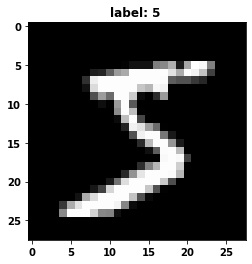

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.title("label: %d "%y_train[0])
plt.show()

# wybór modelu

In [6]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
param_grid = [
  {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C':[0.1,0.02]},
  {'penalty': ['l2'], 'solver': ['sag', 'lbfgs'], 'C':[0.1,0.02]},
 ]

#  'C':[1,0.1,0.01,0.001], 'tol':[1,0.1,0.01,0.001]

scoring = {'Accuracy': 'accuracy'}
clf = GridSearchCV(model, param_grid, scoring=scoring, refit='Accuracy', verbose=1).fit(x_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.2min finished


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def get_metrics(clf, x_train, x_test, y_train, y_test):
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    metric = accuracy_score
    print(type(clf.estimator).__name__, "Train", metric.__name__, accuracy_score(y_train, y_pred_train), sep=",")
    print(type(clf.estimator).__name__, "Test", metric.__name__, accuracy_score(y_test, y_pred_test), sep=",")
    for metric in [precision_score,recall_score, f1_score]:
        print(type(clf.estimator).__name__, "Train", metric.__name__, *metric(y_train, y_pred_train, average=None), sep=",")
        print(type(clf.estimator).__name__, "Test", metric.__name__, *metric(y_test, y_pred_test, average=None), sep=",")

get_metrics(clf, x_train, x_test, y_train, y_test)

LogisticRegression,Train,accuracy_score,1.0
LogisticRegression,Test,accuracy_score,0.836
LogisticRegression,Train,precision_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LogisticRegression,Test,precision_score,0.9523809523809523,0.96875,0.8434782608695652,0.8020833333333334,0.9117647058823529,0.65,0.875,0.7692307692307693,0.8125,0.7572815533980582
LogisticRegression,Train,recall_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LogisticRegression,Test,recall_score,0.9411764705882353,0.9841269841269841,0.8362068965517241,0.719626168224299,0.8454545454545455,0.7471264367816092,0.8850574712643678,0.8080808080808081,0.7303370786516854,0.8297872340425532
LogisticRegression,Train,f1_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LogisticRegression,Test,f1_score,0.9467455621301775,0.9763779527559054,0.8398268398268398,0.7586206896551725,0.8773584905660377,0.6951871657754011,0.8800000000000001,0.7881773399014778,0.7692307692307693,0.7918781725888325


In [68]:
def get_params(clf):
    print(type(clf.estimator).__name__, clf.best_params_)
get_params(clf)

LogisticRegression {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


# Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4)
param_grid = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'], 
}
scoring = {'Accuracy': 'accuracy'}
clf_dt = GridSearchCV(model, param_grid, scoring=scoring, refit='Accuracy', verbose=1).fit(x_train, y_train)
clf_dt.score(x_test, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.7s finished


0.526

In [59]:
get_metrics(clf_dt, x_train, x_test, y_train, y_test)

DecisionTreeClassifier,Train,accuracy_score,0.679
DecisionTreeClassifier,Test,accuracy_score,0.526
DecisionTreeClassifier,Train,precision_score,0.8571428571428571,0.8790322580645161,0.6904761904761905,0.8493150684931506,0.8428571428571429,0.39664804469273746,0.6822429906542056,0.5581395348837209,0.7204301075268817,0.0
DecisionTreeClassifier,Test,precision_score,0.7619047619047619,0.8524590163934426,0.5454545454545454,0.6896551724137931,0.6190476190476191,0.25663716814159293,0.43137254901960786,0.45569620253164556,0.5844155844155844,0.0
DecisionTreeClassifier,Train,recall_score,0.865979381443299,0.9396551724137931,0.5858585858585859,0.6666666666666666,0.5619047619047619,0.7717391304347826,0.776595744680851,0.8205128205128205,0.7701149425287356,0.0
DecisionTreeClassifier,Test,recall_score,0.7529411764705882,0.8253968253968254,0.5172413793103449,0.37383177570093457,0.35454545454545455,0.6666666666666666,0.5057471264367817,0.7272727272727273,0.5056179775280899,0.0
DecisionTreeClassifier,Tr

In [70]:
get_params(clf_dt)

DecisionTreeClassifier {'criterion': 'entropy', 'splitter': 'best'}


In [57]:
from sklearn.tree import export_graphviz

# Creates dot file named tree.dot
export_graphviz(
            clf_dt.best_estimator_,
            out_file =  "myTreeName.dot",
            filled = True,
            rounded = True)
import graphviz
with open("myTreeName.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'

In [61]:
model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

# Support Vector Classifier

In [74]:
from sklearn.svm import SVC
model = SVC()
param_grid = {
    'C': [100,10,1],
}
scoring = {'Accuracy': 'accuracy'}
clf_svc = GridSearchCV(model, param_grid, scoring=scoring, refit='Accuracy', verbose=1).fit(x_train, y_train)
clf_svc.score(x_test, y_test)

# C = 1 daje najlepsze resulataty, gamma nie ma wpływu

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    9.7s finished


0.903

In [75]:
get_metrics(clf_svc, x_train, x_test, y_train, y_test)

SVC,Train,accuracy_score,1.0
SVC,Test,accuracy_score,0.903
SVC,Train,precision_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
SVC,Test,precision_score,0.9318181818181818,0.9765625,0.954954954954955,0.9347826086956522,0.8888888888888888,0.78,0.9204545454545454,0.8811881188118812,0.9113924050632911,0.8380952380952381
SVC,Train,recall_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
SVC,Test,recall_score,0.9647058823529412,0.9920634920634921,0.9137931034482759,0.8037383177570093,0.8727272727272727,0.896551724137931,0.9310344827586207,0.898989898989899,0.8089887640449438,0.9361702127659575
SVC,Train,f1_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
SVC,Test,f1_score,0.9479768786127167,0.9842519685039369,0.9339207048458151,0.864321608040201,0.8807339449541284,0.8342245989304813,0.9257142857142858,0.89,0.8571428571428571,0.8844221105527638


In [76]:
get_params(clf_svc)

SVC {'C': 100}


In [50]:
print(*clf.__dict__.items(), sep="\n")

('scoring', {'Accuracy': 'accuracy'})
('estimator', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False))
('n_jobs', None)
('iid', 'warn')
('refit', 'Accuracy')
('cv', 'warn')
('verbose', 1)
('pre_dispatch', '2*n_jobs')
('error_score', 'raise-deprecating')
('return_train_score', False)
('param_grid', {'C': [100, 10, 1]})
('multimetric_', True)
('best_index_', 0)
('best_score_', 0.903)
('best_params_', {'C': 100})
('best_estimator_', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False))
('refit_time_', 0.774700403213501)
('scorer_', {'Accuracy': make_scorer(accuracy_score)})
('cv_results_', {'mean_fit_time': array([

# Saving and loading models

In [92]:
from sklearn.externals import joblib

for model in [clf, clf_dt, clf_svc]:
    DIRECTORY = "classical_models/"
    joblib_file = DIRECTORY + type(model.best_estimator_).__name__ + ".pkl"
    joblib.dump(model.best_estimator_, joblib_file)

In [95]:
DIRECTORY = "classical_models/"
joblib_file = DIRECTORY + "SVC" + ".pkl"
joblib_model = joblib.load(joblib_file)
score = joblib_model.score(x_test, y_test)
score


0.903

# Voting Classifier

In [56]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(C=1)
dtc = DecisionTreeClassifier(max_depth = 4)
svc = SVC(probability=True)

eclf = VotingClassifier(
    estimators=[('lr', lr), ('dtc', dtc), ('svc', svc)],
    voting='soft'
)

param_grid = {
    'lr__C': [0.1,0.02], 
    'dtc__criterion': ['gini', 'entropy'],
    'svc__C': [100,10]
}

clf = GridSearchCV(estimator=eclf, param_grid=param_grid, cv=3, verbose=1).fit(x_train, y_train)
clf.score(x_test, y_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.4min finished


0.869

In [57]:
clf.__dict__

{'scoring': None, 'estimator': VotingClassifier(estimators=[('lr',
                               LogisticRegression(C=1, class_weight=None,
                                                  dual=False, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=100,
                                                  multi_class='warn',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='warn', tol=0.0001,
                                                  verbose=0, warm_start=False)),
                              ('dtc',
                               DecisionTreeClassifier(class_weight=None,
                                                      criterion='gini',
                                                      max_depth=4,
   

# Neural Network

Data preprocessing

In [74]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=[28,28,1]))
model.add(Dense(1000))
model.add(Dense(100))
model.add(Dense(Y_train.shape[1], activation = 'softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.3, epochs=20, verbose=2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 - 6s - loss: 0.5733 - accuracy: 0.8562 - val_loss: 0.3944 - val_accuracy: 0.8959
Epoch 2/20
42000/42000 - 5s - loss: 0.3851 - accuracy: 0.8893 - val_loss: 0.3444 - val_accuracy: 0.9025
Epoch 3/20
42000/42000 - 5s - loss: 0.3507 - accuracy: 0.8998 - val_loss: 0.3807 - val_accuracy: 0.8933
Epoch 4/20
42000/42000 - 5s - loss: 0.3370 - accuracy: 0.9024 - val_loss: 0.3564 - val_accuracy: 0.9013
Epoch 5/20
42000/42000 - 5s - loss: 0.3298 - accuracy: 0.9047 - val_loss: 0.3350 - val_accuracy: 0.9057
Epoch 6/20
42000/42000 - 5s - loss: 0.3178 - accuracy: 0.9089 - val_loss: 0.3491 - val_accuracy: 0.9046
Epoch 7/20
42000/42000 - 5s - loss: 0.3138 - accuracy: 0.9098 - val_loss: 0.3434 - val_accuracy: 0.9056
Epoch 8/20
42000/42000 - 5s - loss: 0.3057 - accuracy: 0.9126 - val_loss: 0.3371 - val_accuracy: 0.9068
Epoch 9/20
42000/42000 - 6s - loss: 0.3029 - accuracy: 0.9128 - val_loss: 0.3245 - val_accuracy: 0.9134
Epoch 10/20
42

In [ ]:
score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', score[0]) 
print('Train accuracy:', score[1])
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

In [ ]:
from tensorflow.python.keras.utils import plot_model
plot_model(model, to_file='model_DNN.png', show_shapes =True, show_layer_names = False)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


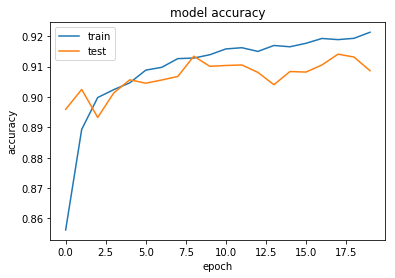

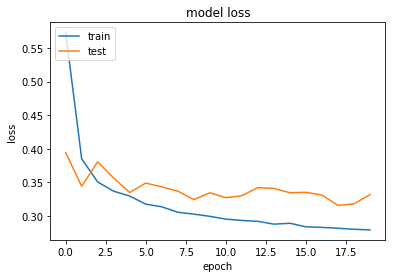

In [84]:
import os
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(12, 4)
plt.subplot(1,2,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
plt.show()

# Convolutional Neural Networks

In [22]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)

In [30]:
num_category = Y_train.shape[1]

In [31]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=[28,28,1]))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_category, activation='softmax'))

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [33]:
batch_size = 128
num_epoch = 10
model_log = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_split=0.3,)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 9s 204us/sample - loss: 2.2677 - accuracy: 0.1532 - val_loss: 2.1237 - val_accuracy: 0.4624
Epoch 2/10
42000/42000 [==============================] - 6s 136us/sample - loss: 2.0950 - accuracy: 0.2911 - val_loss: 1.9333 - val_accuracy: 0.6422
Epoch 3/10
42000/42000 [==============================] - 6s 133us/sample - loss: 1.9286 - accuracy: 0.4026 - val_loss: 1.7306 - val_accuracy: 0.7113
Epoch 4/10
42000/42000 [==============================] - 6s 133us/sample - loss: 1.7500 - accuracy: 0.4917 - val_loss: 1.5204 - val_accuracy: 0.7484
Epoch 5/10
42000/42000 [==============================] - 6s 132us/sample - loss: 1.5776 - accuracy: 0.5485 - val_loss: 1.3204 - val_accuracy: 0.7732
Epoch 6/10
42000/42000 [==============================] - 6s 133us/sample - loss: 1.4250 - accuracy: 0.5887 - val_loss: 1.1467 - val_accuracy: 0.7934
Epoch 7/10
42000/42000 [==========================

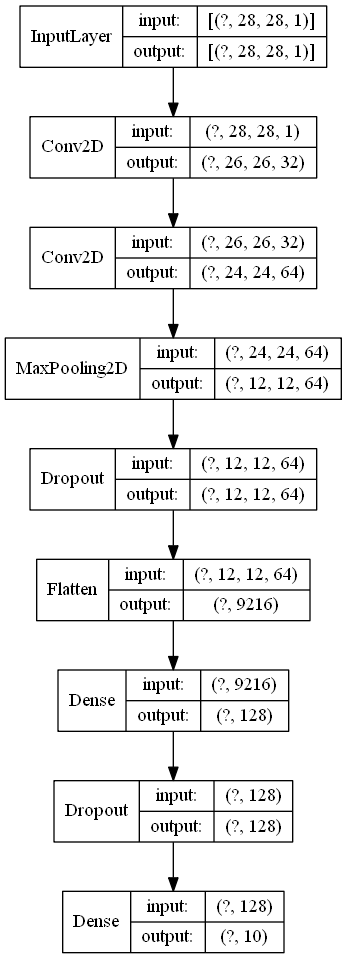

In [34]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_CNN.png', show_shapes =True, show_layer_names = False)

In [36]:
score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', score[0]) 
print('Train accuracy:', score[1])
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Train loss: 0.7420354553222657
Train accuracy: 0.8348
Test loss: 0.7250827960968017
Test accuracy: 0.8471


In [39]:
model_log.history

{'loss': [2.267730087643578,
  2.0950058254514423,
  1.928574264344715,
  1.7500438702447074,
  1.5775908936091831,
  1.4250491438820247,
  1.2832427231016612,
  1.1778263932182675,
  1.0846286876315163,
  1.0108621186755953],
 'accuracy': [0.15323809,
  0.29111904,
  0.40264285,
  0.49166667,
  0.5484762,
  0.5886667,
  0.6275476,
  0.6525238,
  0.6775714,
  0.69357145],
 'val_loss': [2.1236952495574952,
  1.9332582706875272,
  1.7305500948164199,
  1.5204385114245944,
  1.320420623143514,
  1.1467034337785509,
  1.0032845976087783,
  0.8890077081256442,
  0.7991097776095072,
  0.7272695073021783],
 'val_accuracy': [0.4623889,
  0.6421667,
  0.7112778,
  0.74844444,
  0.77316666,
  0.7933889,
  0.80844444,
  0.82361114,
  0.8333333,
  0.84227777]}

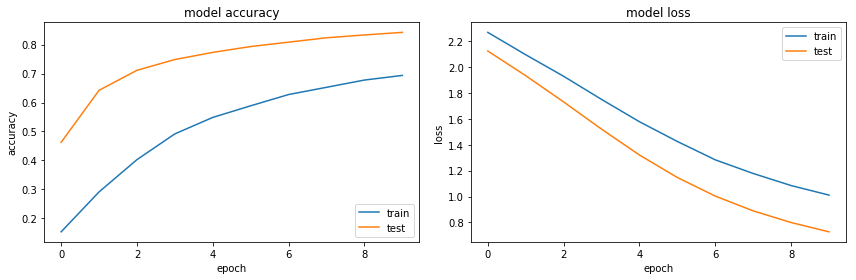

In [47]:
import os
import matplotlib.pyplot as plt
fig = plt.figure()

plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('books_read.png')
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
# KROKI

In [ ]:
# sieci splotowe - Convolutional Neural Networks - kernel_size, kernels_no, padding, 
# Dropout, Flatten, Conv2d, Dense

In [ ]:
# wytrenowanie Google Colab <---
# zapisanie modelu do pliku
# wczytanie modelu z pliku

In [ ]:
# sieci splotowe - Convolutional Neural Networks

In [ ]:
# może kiedyś
# ----------
# RandomForest
# KNeigbours Classifier
# XGBoost
# SVM Classifier DONE